<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Correlation**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis (EDA). You will examine the distribution of the data, identify outliers, and determine the correlation between different columns in the dataset.


## Objectives


In this lab, you will perform the following:


- Identify the distribution of compensation data in the dataset.

- Remove outliers to refine the dataset.

- Identify correlations between various features in the dataset.


## Hands on Lab


##### Step 1: Install and Import Required Libraries


In [12]:
# Install the necessary libraries
!pip install pandas
!pip install matplotlib
!pip install seaborn

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Step 2: Load the Dataset


In [13]:
# Load the dataset from the given URL
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(file_url)

# Display the first few rows to understand the structure of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 3: Analyze and Visualize Compensation Distribution</h3>


**Task**: Plot the distribution and histogram for `ConvertedCompYearly` to examine the spread of yearly compensation among respondents.


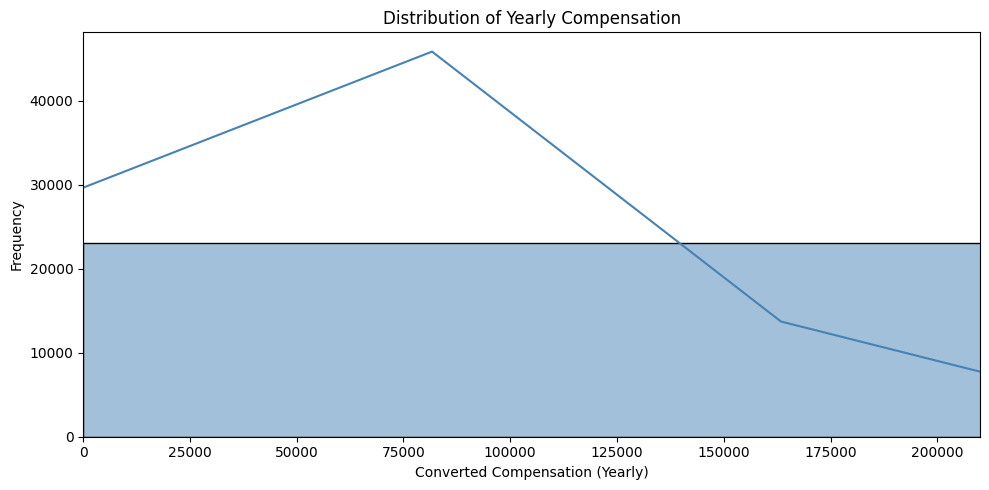

In [14]:
## Write your code here
# Drop missing values in compensation column
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')
comp = df['ConvertedCompYearly'].dropna()

# Histogram and KDE
plt.figure(figsize=(10, 5))
sns.histplot(comp, bins=50, kde=True, color='steelblue')
plt.title('Distribution of Yearly Compensation')
plt.xlabel('Converted Compensation (Yearly)')
plt.ylabel('Frequency')
plt.xlim(0, comp.quantile(0.95))  # Limit x-axis for clarity
plt.tight_layout()
plt.show()


<h3>Step 4: Calculate Median Compensation for Full-Time Employees</h3>


**Task**: Filter the data to calculate the median compensation for respondents whose employment status is "Employed, full-time."


In [15]:
## Write your code here
# Filter for full-time employed respondents
full_time = df[df['Employment'] == 'Employed, full-time']
median_ft = full_time['ConvertedCompYearly'].median()
print(f"Median Compensation for Full-Time Employees: ${median_ft:,.2f}")


Median Compensation for Full-Time Employees: $69,814.00


<h3>Step 5: Analyzing Compensation Range and Distribution by Country</h3>


Explore the range of compensation in the ConvertedCompYearly column by analyzing differences across countries. Use box plots to compare the compensation distributions for each country to identify variations and anomalies within each region, providing insights into global compensation trends.



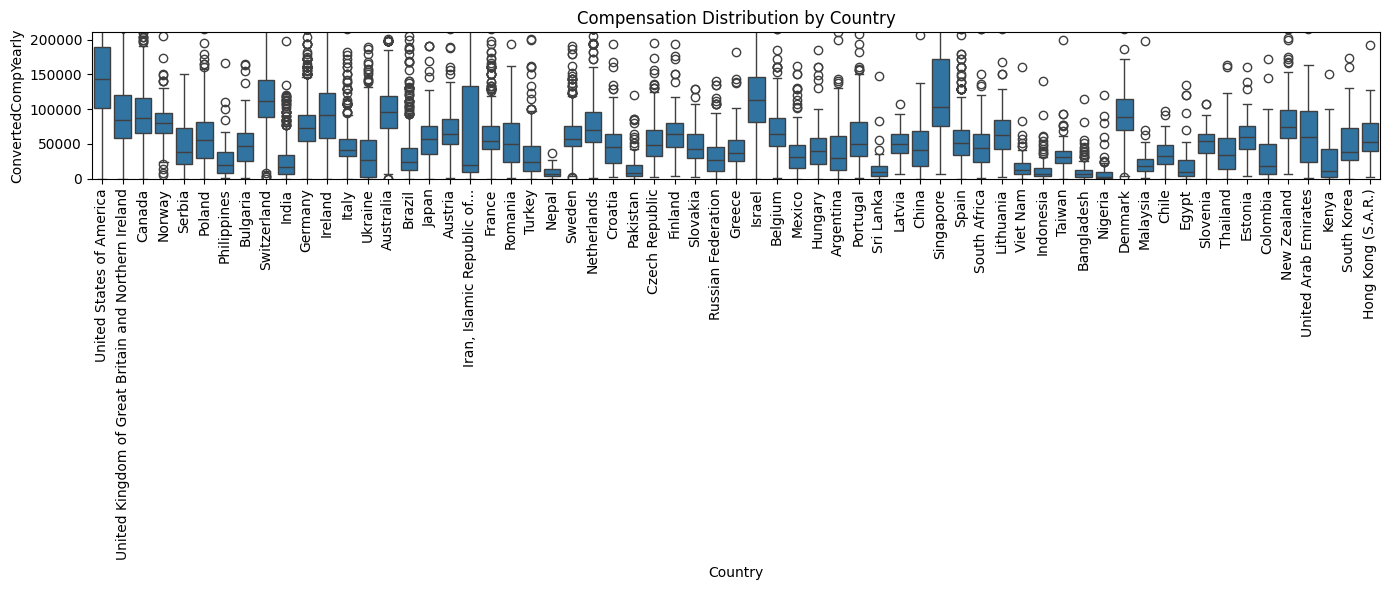

In [16]:
## Write your code here
# Filter countries with sufficient responses
country_counts = df['Country'].value_counts()
top_countries = country_counts[country_counts > 100].index

# Filter dataset
df_country = df[df['Country'].isin(top_countries)]

# Boxplot
plt.figure(figsize=(14, 6))
sns.boxplot(data=df_country, x='Country', y='ConvertedCompYearly')
plt.xticks(rotation=90)
plt.title('Compensation Distribution by Country')
plt.ylim(0, df_country['ConvertedCompYearly'].quantile(0.95))  # Clip high values for readability
plt.tight_layout()
plt.show()


<h3>Step 6: Removing Outliers from the Dataset</h3>


**Task**: Create a new DataFrame by removing outliers from the `ConvertedCompYearly` column to get a refined dataset for correlation analysis.


In [21]:
## Write your code here
# IQR method
Q1 = df['ConvertedCompYearly'].quantile(0.25)
Q3 = df['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df_clean = df[(df['ConvertedCompYearly'] >= lower_bound) & (df['ConvertedCompYearly'] <= upper_bound)]
print("Original size:", df.shape)
print("After removing outliers:", df_clean.shape)

Original size: (65437, 114)
After removing outliers: (22457, 114)


<h3>Step 7: Finding Correlations Between Key Variables</h3>


**Task**: Calculate correlations between `ConvertedCompYearly`, `WorkExp`, and `JobSatPoints_1`. Visualize these correlations with a heatmap.


Correlation Matrix:
                      ConvertedCompYearly  WorkExp  JobSatPoints_1
ConvertedCompYearly                  NaN      NaN             NaN
WorkExp                              NaN      NaN             NaN
JobSatPoints_1                       NaN      NaN             NaN


/tmp/ipykernel_1093/4083112798.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['WorkExp'] = df_clean['YearsCodePro'].replace({'Less than 1 year': 0, 'More than 50 years': 51})
/tmp/ipykernel_1093/4083112798.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['WorkExp'] = pd.to_numeric(df_clean['WorkExp'], errors='coerce')
/tmp/ipykernel_1093/4083112798.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

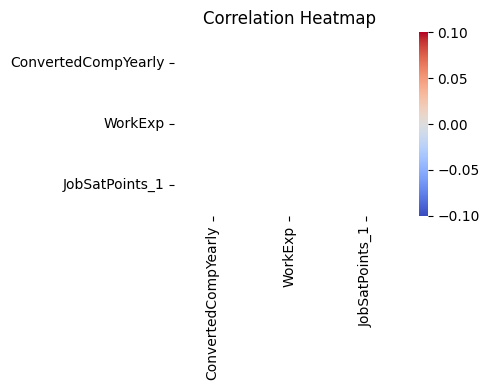

In [22]:
## Write your code here
# Convert WorkExp and JobSatPoints_1 to numeric
df_clean['WorkExp'] = df_clean['YearsCodePro'].replace({'Less than 1 year': 0, 'More than 50 years': 51})
df_clean['WorkExp'] = pd.to_numeric(df_clean['WorkExp'], errors='coerce')

# Map JobSat to numerical points if needed
sat_map = {
    'Very dissatisfied': 1,
    'Dissatisfied': 2,
    'Neither satisfied nor dissatisfied': 3,
    'Satisfied': 4,
    'Very satisfied': 5
}
df_clean['JobSatPoints_1'] = df_clean['JobSat'].map(sat_map)

# Drop rows with missing correlation data
corr_data = df_clean[['ConvertedCompYearly', 'WorkExp', 'JobSatPoints_1']].dropna()

# Correlation matrix
corr_matrix = corr_data.corr()
print("Correlation Matrix:\n", corr_matrix)

# Heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


<h3>Step 8: Scatter Plot for Correlations</h3>


**Task**: Create scatter plots to examine specific correlations between `ConvertedCompYearly` and `WorkExp`, as well as between `ConvertedCompYearly` and `JobSatPoints_1`.


Columns in DataFrame: ['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check', 'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline', 'TechDoc', 'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'BuildvsBuy', 'TechEndorse', 'Country', 'Currency', 'CompTotal', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'LanguageAdmired', 'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'DatabaseAdmired', 'PlatformHaveWorkedWith', 'PlatformWantToWorkWith', 'PlatformAdmired', 'WebframeHaveWorkedWith', 'WebframeWantToWorkWith', 'WebframeAdmired', 'EmbeddedHaveWorkedWith', 'EmbeddedWantToWorkWith', 'EmbeddedAdmired', 'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith', 'MiscTechAdmired', 'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith', 'ToolsTechAdmired', 'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'NEWCollabToolsAdmired', 'OpSysPersonal use', 'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith', 'OfficeStac

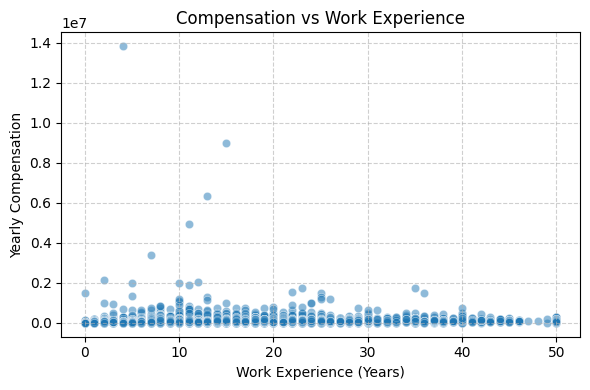

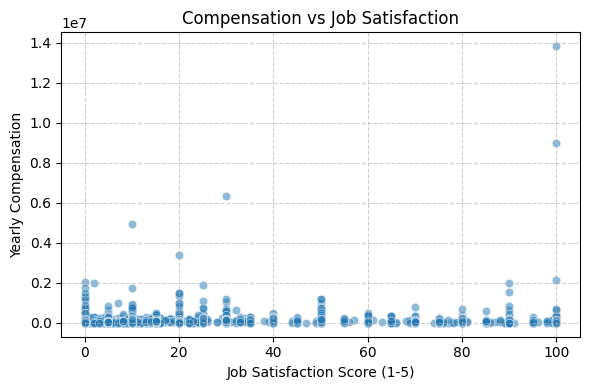

In [23]:
## Write your code here
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset (you must replace this with your actual file or DataFrame name)
# Example: df = pd.read_csv('developer_survey.csv')

# Preview column names to ensure required ones are present
print("Columns in DataFrame:", df.columns.tolist())

# Check if required columns exist
required_columns = ['WorkExp', 'ConvertedCompYearly', 'JobSatPoints_1']
missing = [col for col in required_columns if col not in df.columns]
if missing:
    raise ValueError(f"Missing required columns: {missing}")

# Define corr_data with necessary columns and clean it
corr_data = df[required_columns].copy()

# Ensure data types are numeric
for col in required_columns:
    corr_data[col] = pd.to_numeric(corr_data[col], errors='coerce')

# Drop missing values
corr_data = corr_data.dropna()

# --- Plot 1: Compensation vs Work Experience ---
plt.figure(figsize=(6, 4))
sns.scatterplot(
    data=corr_data,
    x='WorkExp',
    y='ConvertedCompYearly',
    alpha=0.5
)
plt.title('Compensation vs Work Experience')
plt.xlabel('Work Experience (Years)')
plt.ylabel('Yearly Compensation')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# --- Plot 2: Compensation vs Job Satisfaction ---
plt.figure(figsize=(6, 4))
sns.scatterplot(
    data=corr_data,
    x='JobSatPoints_1',
    y='ConvertedCompYearly',
    alpha=0.5
)
plt.title('Compensation vs Job Satisfaction')
plt.xlabel('Job Satisfaction Score (1-5)')
plt.ylabel('Yearly Compensation')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



<h3>Summary</h3>


In this lab, you practiced essential skills in correlation analysis by:

- Examining the distribution of yearly compensation with histograms and box plots.
- Detecting and removing outliers from compensation data.
- Calculating correlations between key variables such as compensation, work experience, and job satisfaction.
- Visualizing relationships with scatter plots and heatmaps to gain insights into the associations between these features.

By following these steps, you have developed a solid foundation for analyzing relationships within the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
